# BFCAI Summer Training – Machine Learning

# Final Project (Kc_house)
 
# by/Eng_Radwa mohamed said

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno   # i use it to visual missing vals in dataset
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


## Read data 

In [2]:
df=pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df1=df.drop(columns = ['date'])
df1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21192,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21193,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21194,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21195,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Data analysis & cleaning 

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21197 entries, 0 to 21196
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21197 non-null  int64  
 1   price          21197 non-null  float64
 2   bedrooms       21197 non-null  int64  
 3   bathrooms      21197 non-null  float64
 4   sqft_living    21197 non-null  int64  
 5   sqft_lot       21197 non-null  int64  
 6   floors         21197 non-null  float64
 7   waterfront     21197 non-null  int64  
 8   view           21197 non-null  int64  
 9   condition      21197 non-null  int64  
 10  grade          21197 non-null  int64  
 11  sqft_above     21197 non-null  int64  
 12  sqft_basement  21197 non-null  int64  
 13  yr_built       21197 non-null  int64  
 14  yr_renovated   21197 non-null  int64  
 15  zipcode        21197 non-null  int64  
 16  lat            21197 non-null  float64
 17  long           21197 non-null  float64
 18  sqft_l

In [6]:
df1.shape

(21197, 20)

In [7]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values

In [8]:
df1['price'].value_counts()

450000.0    169
350000.0    166
550000.0    157
500000.0    148
325000.0    146
           ... 
713250.0      1
151600.0      1
376500.0      1
404600.0      1
402101.0      1
Name: price, Length: 3584, dtype: int64

In [9]:
df1['view'].value_counts()

0    19117
2      944
3      494
1      327
4      315
Name: view, dtype: int64

In [10]:
df1['bathrooms'].value_counts()

2.50    5283
1.00    3775
1.75    2979
2.25    2005
2.00    1895
1.50    1416
2.75    1163
3.00     739
3.50     720
3.25     582
3.75     152
4.00     134
4.50      99
4.25      78
0.75      70
4.75      23
5.00      21
5.25      13
0.00       9
1.25       9
5.50       9
6.00       6
5.75       4
0.50       3
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='count'>

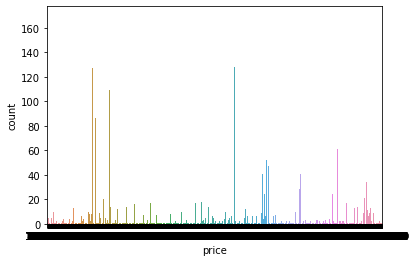

In [11]:

sns.countplot(df1['price'])

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

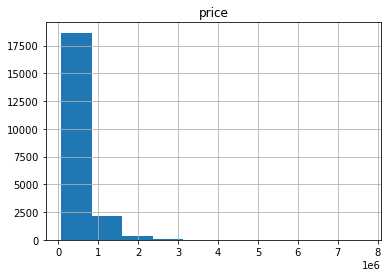

In [12]:
df.hist('price')

## Histogram 

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

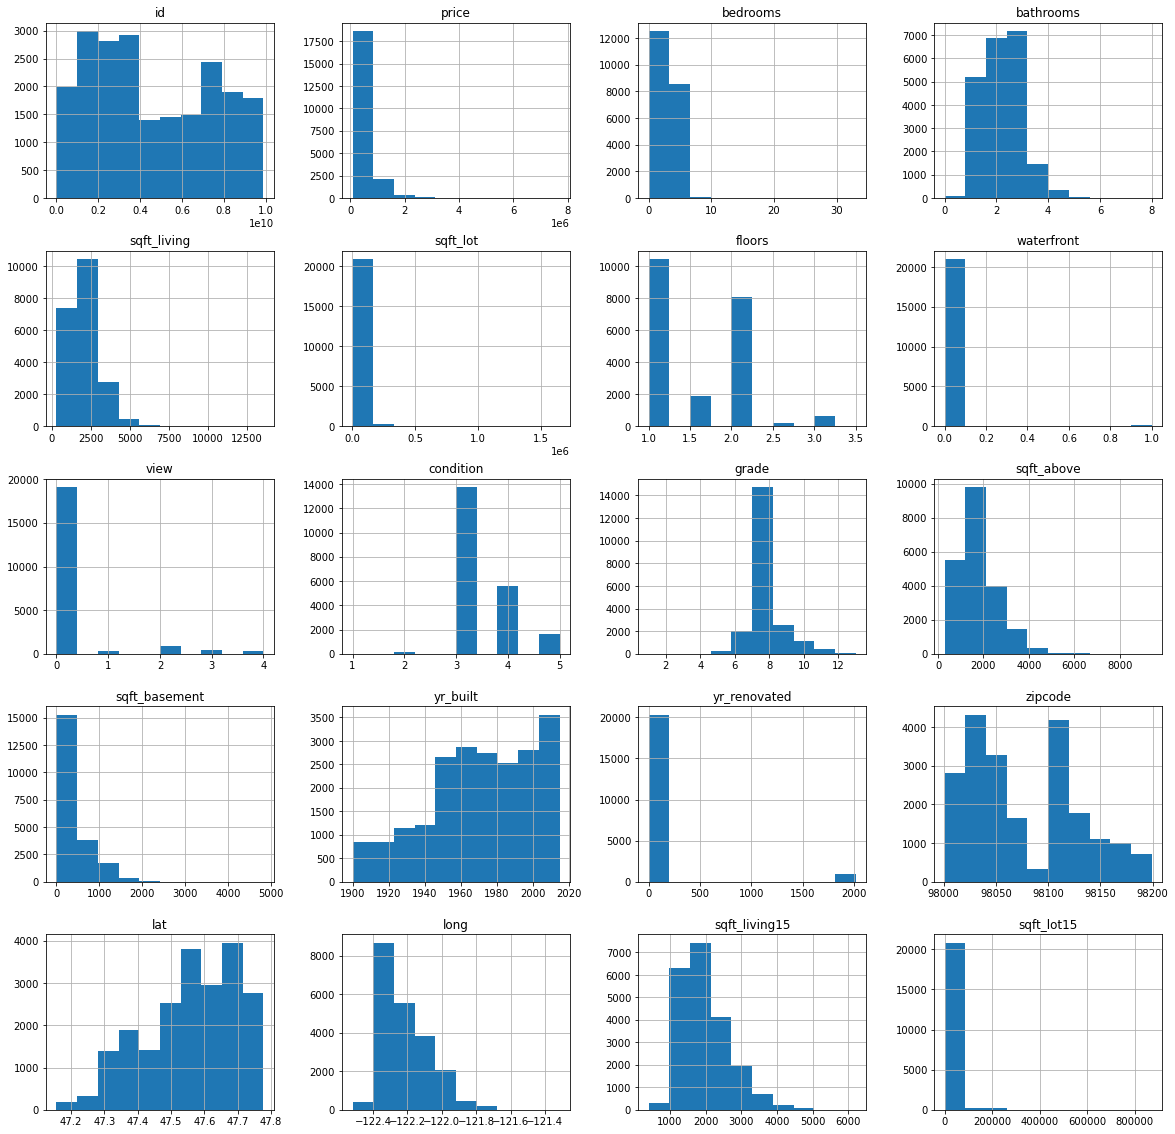

In [13]:
df1.hist(figsize=(20,20))

<AxesSubplot:ylabel='price'>

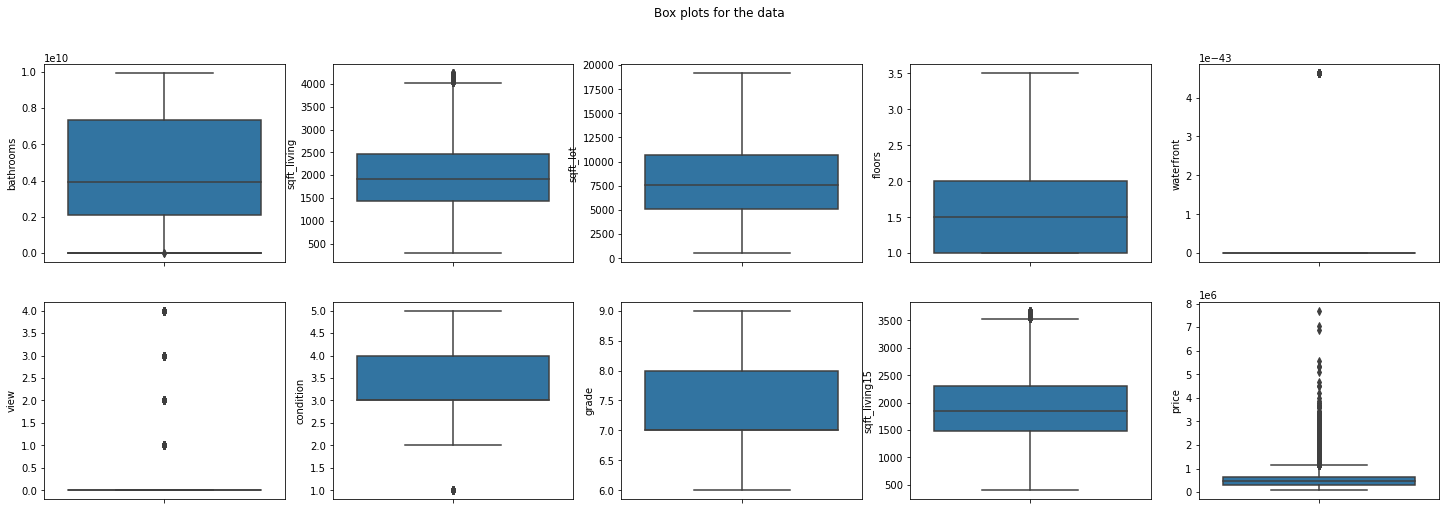

In [180]:
# Visualization
fig, axes = plt.subplots(2, 5, figsize=(25, 8))

fig.suptitle('Box plots for the data')

sns.boxplot(ax=axes[0, 0], data=df1, y='id')
sns.boxplot(ax=axes[0, 0], data=df1, y='lat')
sns.boxplot(ax=axes[0, 0], data=df1, y='bedrooms')
sns.boxplot(ax=axes[0, 0], data=df1, y='bathrooms')
sns.boxplot(ax=axes[0, 1], data=df1, y='sqft_living')
sns.boxplot(ax=axes[0, 2], data=df1, y='sqft_lot')
sns.boxplot(ax=axes[0, 3], data=df1, y='floors')
sns.boxplot(ax=axes[0, 4], data=df1, y='waterfront')
sns.boxplot(ax=axes[1, 0], data=df1, y='view')
sns.boxplot(ax=axes[1, 1], data=df1, y='condition')
sns.boxplot(ax=axes[1, 2], data=df1, y='grade')
sns.boxplot(ax=axes[1, 3], data=df1, y='sqft_living15')
sns.boxplot(ax=axes[1, 4], data=df1, y='price')

<AxesSubplot:xlabel='date', ylabel='Count'>

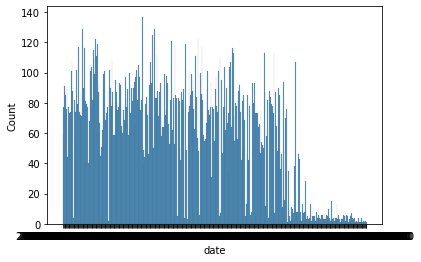

In [15]:
sns.histplot(data= df, x="date",multiple='stack')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

<AxesSubplot:xlabel='floors', ylabel='Density'>

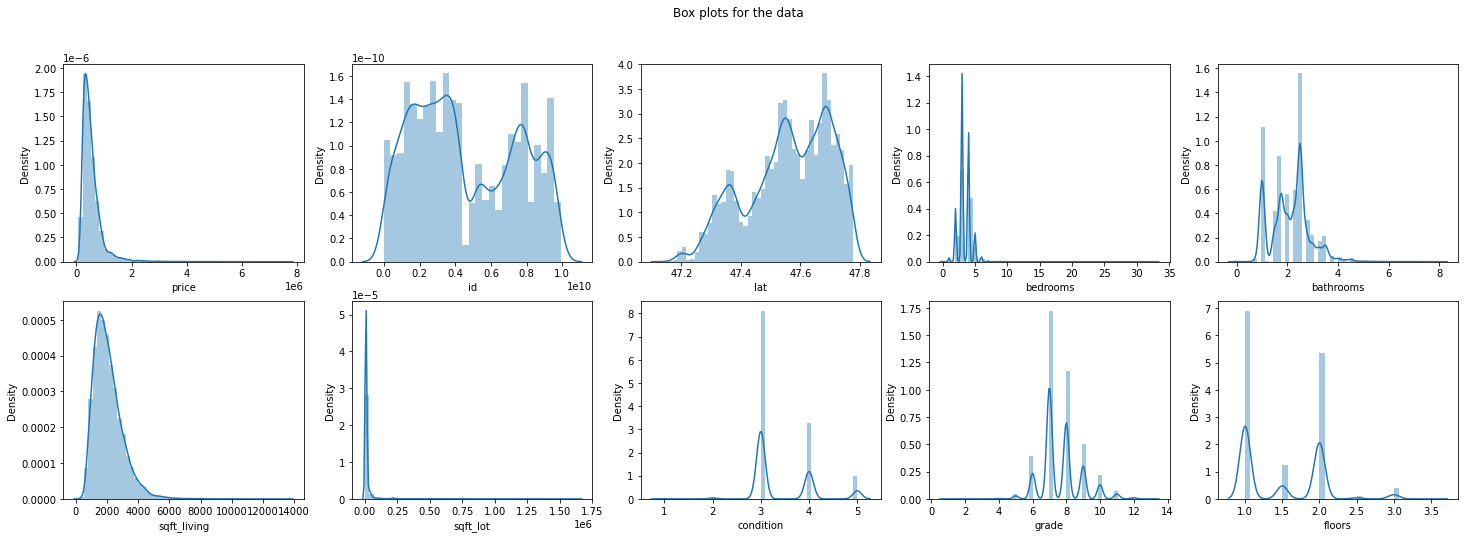

In [16]:
# Visualization
fig, axes = plt.subplots(2, 5, figsize=(25, 8))

fig.suptitle('Box plots for the data')

sns.distplot(df1['price'],ax=axes[0, 0])
sns.distplot(df1['id'],ax=axes[0, 1])
sns.distplot (df1['lat'],ax=axes[0, 2])
sns.distplot(df1['bedrooms'],ax=axes[0, 3])
sns.distplot(df1['bathrooms'],ax=axes[0, 4])
sns.distplot(df1['sqft_living'],ax=axes[1, 0])
sns.distplot(df1['sqft_lot'],ax=axes[1, 1])
sns.distplot(df1['condition'],ax=axes[1, 2] )
sns.distplot(df1['grade'],ax=axes[1, 3], )
sns.distplot(df1['floors'],ax=axes[1, 4])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\

<AxesSubplot:xlabel='floors', ylabel='price'>

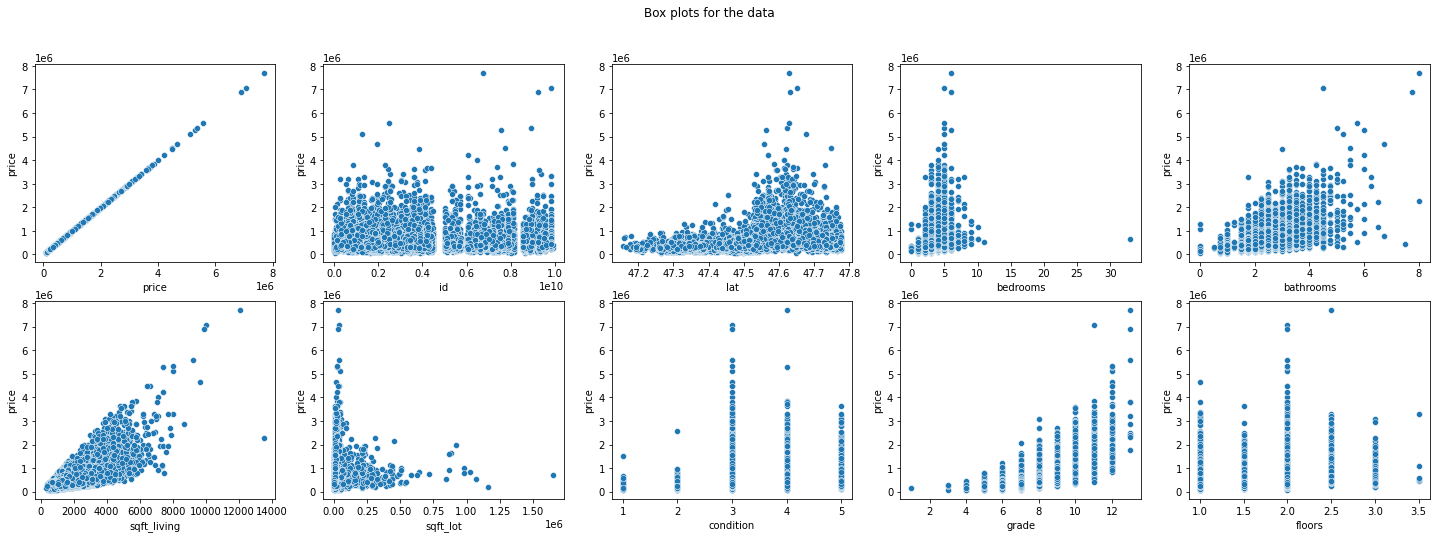

In [17]:
fig, axes = plt.subplots(2, 5, figsize=(25, 8))

fig.suptitle('Box plots for the data')

sns.scatterplot(df['price'],y=df1.price,ax=axes[0, 0])
sns.scatterplot(df['id'],y=df1.price,ax=axes[0, 1])
sns.scatterplot(df['lat'],y=df1.price,ax=axes[0, 2])
sns.scatterplot(df['bedrooms'],y=df1.price,ax=axes[0, 3])
sns.scatterplot(df['bathrooms'],y=df1.price,ax=axes[0, 4])
sns.scatterplot(df['sqft_living'],y=df1.price,ax=axes[1, 0])
sns.scatterplot(df['sqft_lot'],y=df1.price,ax=axes[1, 1])
sns.scatterplot(df['condition'],y=df1.price,ax=axes[1, 2] )
sns.scatterplot(df['grade'],y=df1.price,ax=axes[1, 3], )
sns.scatterplot(df['floors'],y=df1.price,ax=axes[1, 4])

<AxesSubplot:>

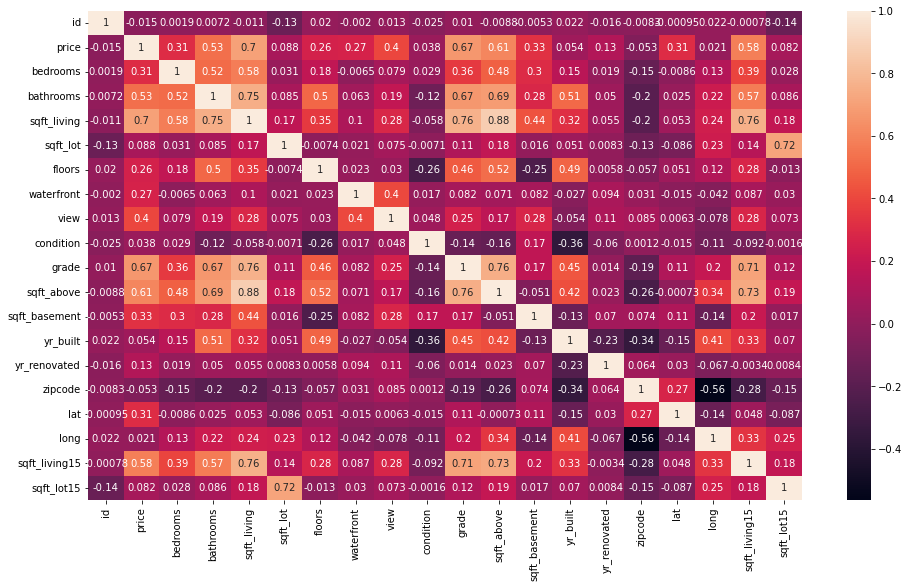

In [18]:
corr = df1.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

<AxesSubplot:>

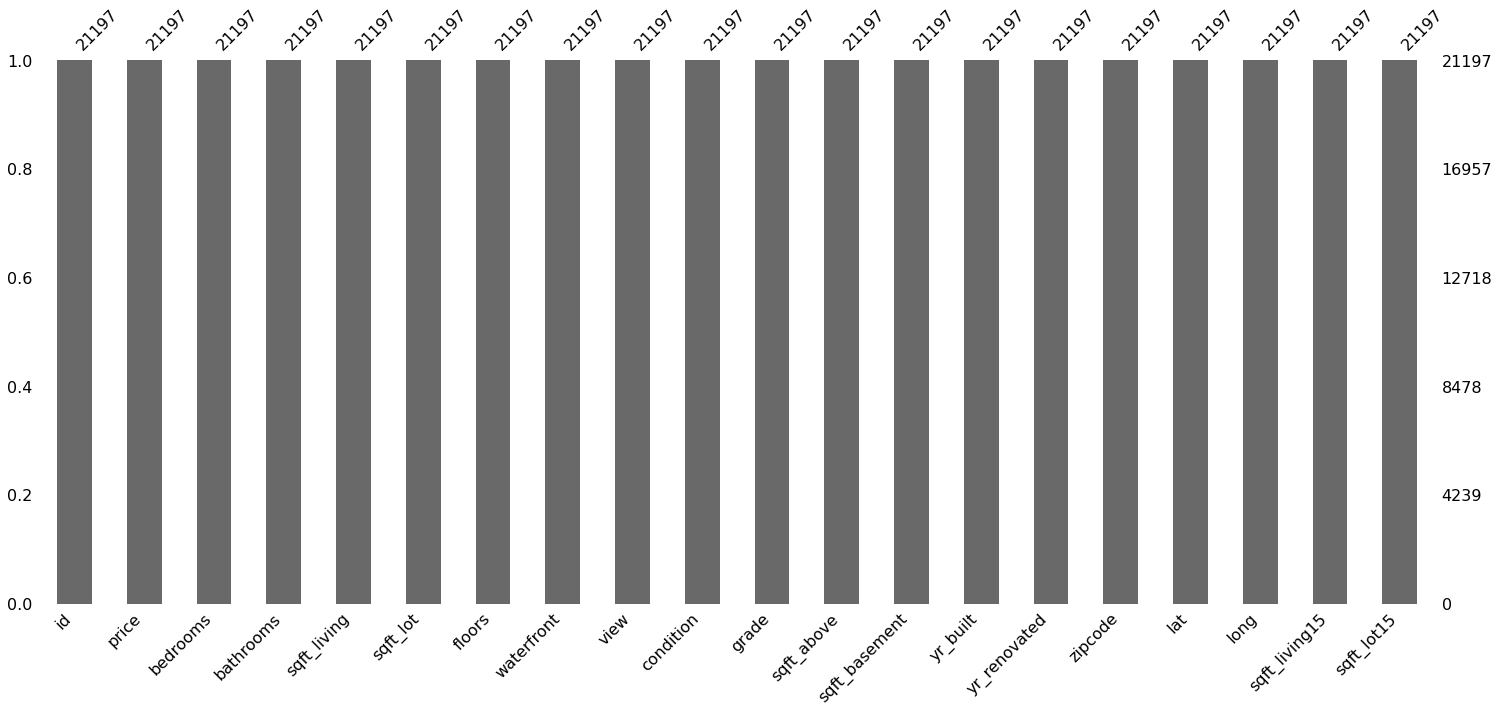

In [19]:
msno.bar(df1) # missing value

## Remove duplicated 

In [20]:
df1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21192    False
21193    False
21194    False
21195    False
21196    False
Length: 21197, dtype: bool

In [21]:
df[df1.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,1825069031,20141016T000000,550000.0,4,1.75,2410,8447,2.0,0,3,...,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14567,6308000010,20150423T000000,585000.0,3,2.50,2290,5089,2.0,0,0,...,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
19638,8648900110,20140826T000000,555000.0,3,2.50,1940,3211,2.0,0,0,...,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


In [22]:
dups_removed = df1.drop_duplicates()

## Remove Outliers 

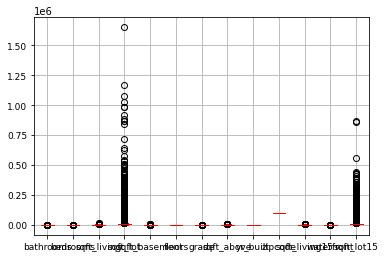

In [23]:
df_colums=['bathrooms', 'bedrooms','sqft_living','sqft_lot','sqft_basement','floors','grade','sqft_above','yr_built','zipcode','sqft_living15','waterfront','sqft_lot15']

boxplot =df1.boxplot(column=df_colums, grid=True, fontsize=9,color='red')

In [24]:
q1 = df1[df_colums].quantile(0.25)
q3 = df1[df_colums].quantile(0.75)
Outliers_IQR = q3-q1
print("outlier Counter of the all features")
((df1 < (q1 - 1.5 * Outliers_IQR )) | (df1> (q3 + 1.5 * Outliers_IQR ))).sum()

outlier Counter of the all features


C:\Users\hp\AppData\Local\Temp\ipykernel_4424\3684938086.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df1 < (q1 - 1.5 * Outliers_IQR )) | (df1> (q3 + 1.5 * Outliers_IQR ))).sum()


bathrooms         561
bedrooms          541
condition           0
floors              0
grade            1871
id                  0
lat                 0
long                0
price               0
sqft_above        601
sqft_basement     490
sqft_living       566
sqft_living15     514
sqft_lot         2387
sqft_lot15       2160
view                0
waterfront        162
yr_built            0
yr_renovated        0
zipcode             0
dtype: int64

In [25]:
max_limit = q3 + (1.5 * Outliers_IQR)
min_limit = q1 - (1.5 * Outliers_IQR)

In [26]:
for col in df1.columns:
    if df1[col].dtypes != 'object':
        df1[df_colums] = np.where(df1[df_colums]>max_limit,df1[df_colums].mean(),np.where(df1[df_colums]<min_limit,df1[df_colums].mean(),df1[df_colums]))

In [27]:
print("outlier Counter of the all features")
((df1 < (q1 - 1.5 * Outliers_IQR)) | (df1> (q3 + 1.5 * Outliers_IQR))).sum()

outlier Counter of the all features


C:\Users\hp\AppData\Local\Temp\ipykernel_4424\3465670568.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df1 < (q1 - 1.5 * Outliers_IQR)) | (df1> (q3 + 1.5 * Outliers_IQR))).sum()


bathrooms          0
bedrooms           0
condition          0
floors             0
grade              0
id                 0
lat                0
long               0
price              0
sqft_above         0
sqft_basement      0
sqft_living        0
sqft_living15      0
sqft_lot           0
sqft_lot15         0
view               0
waterfront       162
yr_built           0
yr_renovated       0
zipcode            0
dtype: int64

## Transformation 

In [28]:
#transformation
t_df = df1.copy()
t_df['log'] =t_df['price'].transform(np.log10)
display(t_df)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log
0,7129300520,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0,3,...,1180.0,0.0,1955.0,0,98178.0,47.5112,-122.257,1340.0,5650.0,5.346157
1,6414100192,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0,3,...,2170.0,400.0,1951.0,1991,98125.0,47.7210,-122.319,1690.0,7639.0,5.730782
2,5631500400,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0,3,...,770.0,0.0,1933.0,0,98028.0,47.7379,-122.233,2720.0,8062.0,5.255273
3,2487200875,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0,5,...,1050.0,910.0,1965.0,0,98136.0,47.5208,-122.393,1360.0,5000.0,5.781037
4,1954400510,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0,3,...,1680.0,0.0,1987.0,0,98074.0,47.6168,-122.045,1800.0,7503.0,5.707570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21192,263000018,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0,3,...,1530.0,0.0,2009.0,0,98103.0,47.6993,-122.346,1530.0,1509.0,5.556303
21193,6600060120,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0,3,...,2310.0,0.0,2014.0,0,98146.0,47.5107,-122.362,1830.0,7200.0,5.602060
21194,1523300141,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0,3,...,1020.0,0.0,2009.0,0,98144.0,47.5944,-122.299,1020.0,2007.0,5.604335
21195,291310100,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0,3,...,1600.0,0.0,2004.0,0,98027.0,47.5345,-122.069,1410.0,1287.0,5.602060


## Data imbalancing 

In [29]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
s=RandomOverSampler()
x_data,y_data=s.fit_resample(x,y)
print(Counter(y_data))

Counter({5650: 422, 7639: 422, 8062: 422, 5000: 422, 7503: 422, 101930: 422, 6819: 422, 9711: 422, 8113: 422, 7570: 422, 8925: 422, 6000: 422, 12697: 422, 10208: 422, 4850: 422, 4000: 422, 14018: 422, 4300: 422, 5095: 422, 8850: 422, 4980: 422, 20336: 422, 7005: 422, 8386: 422, 6865: 422, 4705: 422, 3573: 422, 3861: 422, 6235: 422, 6026: 422, 3980: 422, 1756: 422, 5080: 422, 8720: 422, 3264: 422, 11467: 422, 4700: 422, 7800: 422, 11884: 422, 5669: 422, 30617: 422, 5639: 422, 2640: 422, 8808: 422, 9232: 422, 8840: 422, 13685: 422, 5100: 422, 72513: 422, 9364: 422, 9133: 422, 4080: 422, 6738: 422, 4500: 422, 4750: 422, 11044: 422, 8542: 422, 18900: 422, 8750: 422, 9500: 422, 3090: 422, 11049: 422, 4557: 422, 12635: 422, 20158: 422, 38917: 422, 4745: 422, 7807: 422, 50529: 422, 35020: 422, 7500: 422, 5060: 422, 5693: 422, 39750: 422, 5363: 422, 6405: 422, 6720: 422, 8797: 422, 7203: 422, 4800: 422, 8165: 422, 7349: 422, 2025: 422, 1106: 422, 7510: 422, 6250: 422, 10500: 422, 6045: 422, 15

## Data normalization 

In [30]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
d=m.fit_transform(x_data)
d

array([[0.72010308, 0.01926557, 0.09090909, ..., 0.57149751, 0.21760797,
        0.16193426],
       [0.64785332, 0.06072131, 0.09090909, ..., 0.90895931, 0.16611296,
        0.22216486],
       [0.56879485, 0.01377049, 0.06060606, ..., 0.93614283, 0.23754153,
        0.3994149 ],
       ...,
       [0.02263652, 0.11311475, 0.12121212, ..., 0.83657713, 0.52906977,
        0.5198761 ],
       [0.02263652, 0.11311475, 0.12121212, ..., 0.83657713, 0.52906977,
        0.5198761 ],
       [0.02263652, 0.11311475, 0.12121212, ..., 0.83657713, 0.52906977,
        0.5198761 ]])

## Split Data 

In [31]:
from sklearn.model_selection import train_test_split


In [92]:
x_train=df1.drop(['price'],axis=1)
print(x_train)

               id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520       3.0       1.00       1180.0    5650.0     1.0   
1      6414100192       3.0       2.25       2570.0    7242.0     2.0   
2      5631500400       2.0       1.00        770.0   10000.0     1.0   
3      2487200875       4.0       3.00       1960.0    5000.0     1.0   
4      1954400510       3.0       2.00       1680.0    8080.0     1.0   
...           ...       ...        ...          ...       ...     ...   
21192   263000018       3.0       2.50       1530.0    1131.0     3.0   
21193  6600060120       4.0       2.50       2310.0    5813.0     2.0   
21194  1523300141       2.0       0.75       1020.0    1350.0     2.0   
21195   291310100       3.0       2.50       1600.0    2388.0     2.0   
21196  1523300157       2.0       0.75       1020.0    1076.0     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0             0.0     0          3    7.0      1180

In [93]:
y_train=df1['price']
print(y_train)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21192    360000.0
21193    400000.0
21194    402101.0
21195    400000.0
21196    325000.0
Name: price, Length: 21197, dtype: float64


In [138]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train, test_size= 0.3,random_state=40)

## Use Ridge  Regression to classify your records  

model score :  0.8428534515158594
    
[ 1.93417728e-06 -5.70093404e+03  4.68826983e+04  8.26867568e+00
  2.69849660e+00  4.18796079e+04  0.00000000e+00  3.77392743e+04
  1.19213788e+04  3.21600547e+04 -6.20090553e+00 -1.65648123e+01
 -1.67776146e+02 -1.09507061e+01  5.84563247e+02  2.74259486e+05
 -2.19353675e+05  8.91303558e+01 -3.63716272e+00]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


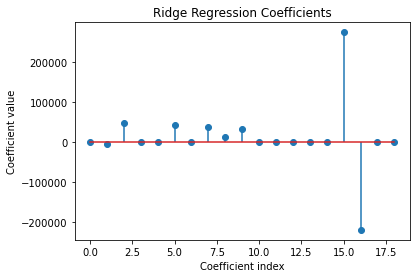

In [139]:
from sklearn.linear_model import Ridge
# Create the Ridge model
model = Ridge(alpha=1.0,normalize=True)
# Fit the model to the training data
model.fit(x_train, y_train)

# Predict the values on the test data
y_pred = model.predict(x_test)

# Evaluate the model
score = model.score(x_test, y_test)
print("model score : ",model.score(x_test,y_test))
print("    ")
print(model.coef_)

# Plot the coefficient values
fig, ax = plt.subplots()
ax.stem(model.coef_, use_line_collection=True)
ax.set_xlabel('Coefficient index')
ax.set_ylabel('Coefficient value')
ax.set_title('Ridge Regression Coefficients')
plt.show()

## GridSearchCV 

In [146]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0], 'normalize': [True, False]}
# Create GridSearchCV object
clf = GridSearchCV(estimator=model, param_grid=param_grid, scoring=['neg_mean_squared_error','r2'],refit='r2' ,cv=5)




In [154]:
clf.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pip

GridSearchCV(cv=5, estimator=Ridge(normalize=True),
             param_grid={'alpha': [0.1, 1.0, 10.0], 'normalize': [True, False]},
             refit='r2', scoring=['neg_mean_squared_error', 'r2'])

In [148]:
print(clf.best_estimator_)# to get complete details of the best model

Ridge(alpha=10.0, normalize=True)


In [149]:
print(clf.best_params_) # to get only the hyperparameters value

{'alpha': 10.0, 'normalize': True}


## R-squared 

In [153]:
from sklearn.metrics import r2_score 
r2_sco=r2_score(y_test,y_pred)*100
print("ROC-AUC score of r2:"r2_sco)

ROC-AUC score of r2 : 84.28534515158594


## kc_house_data_test_hidden

In [163]:
dff=pd.read_csv('kc_house_data_test_hidden.csv')

In [164]:
dff.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6206100030,20150501T000000,3,1.00,980,10960,1.0,0,0,4,7,980,0,1953,0,98005,47.5908,-122.173,2100,10960
1,7888300340,20141124T000000,3,1.00,1730,7950,1.0,0,0,4,7,1180,550,1961,0,98198,47.3644,-122.312,1830,8890
2,1180000885,20141030T000000,3,2.50,3070,5871,3.0,0,0,4,8,2510,560,1928,0,98178,47.5007,-122.223,2220,4000
3,1081330060,20140813T000000,4,2.25,2100,12738,2.0,0,0,4,8,2100,0,1975,0,98059,47.4698,-122.118,2000,12090
4,9536600105,20150109T000000,3,2.75,2080,16740,1.0,0,3,3,8,1580,500,1966,0,98198,47.3632,-122.324,2175,7568


In [165]:
dff1=dff.drop(columns = ['date'])
dff1

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6206100030,3,1.00,980,10960,1.0,0,0,4,7,980,0,1953,0,98005,47.5908,-122.173,2100,10960
1,7888300340,3,1.00,1730,7950,1.0,0,0,4,7,1180,550,1961,0,98198,47.3644,-122.312,1830,8890
2,1180000885,3,2.50,3070,5871,3.0,0,0,4,8,2510,560,1928,0,98178,47.5007,-122.223,2220,4000
3,1081330060,4,2.25,2100,12738,2.0,0,0,4,8,2100,0,1975,0,98059,47.4698,-122.118,2000,12090
4,9536600105,3,2.75,2080,16740,1.0,0,3,3,8,1580,500,1966,0,98198,47.3632,-122.324,2175,7568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,3066400710,3,2.50,2520,10012,2.0,0,0,3,10,2520,0,1987,0,98074,47.6295,-122.051,2680,10071
412,795000765,2,1.00,760,5500,1.5,0,0,3,5,760,0,1947,0,98168,47.5045,-122.329,1040,5515
413,2767603535,3,1.75,1310,5000,2.0,0,0,4,7,1310,0,1901,0,98107,47.6722,-122.379,1270,4750
414,7774200070,4,2.50,2750,13950,1.0,0,3,4,8,1380,1370,1948,0,98146,47.4938,-122.364,2460,13950


[ 426173.56911227  480495.48819461  715071.76751849  519919.74716443
  761169.06689927  580051.90951611  550442.01772776  558206.55726759
  549669.7872709   565469.10523115  529444.91603397  561562.70522968
  598471.1259737   534893.73260389  441284.69341744 1246629.3022978
  586302.9335814   404676.07316956  629616.83782077  581617.08555199
  944523.23075043  666904.59370878  411218.02320692  549967.71890917
  794683.31761387  476195.49453194  696797.04210031  978688.71927868
  585441.10985766  405311.44890043  625888.85472013  585366.80859531
  715604.87090957  593871.90662181  742943.76892677  595105.16542926
  621655.32469942  601068.63218962  544761.46830584  262124.52846655
  427506.66073924  502673.29746605  463569.86945777  565970.56116648
  523770.32568395  407204.93554515  645922.76949573  805325.0714321
  525455.73562099  691786.88004084  411219.34831542  469576.49385951
  501217.44531207  454147.81258239  459184.13381419  984061.00174236
  274326.33173524  606017.35453209  

Text(0, 0.5, 'The prediction Value ')

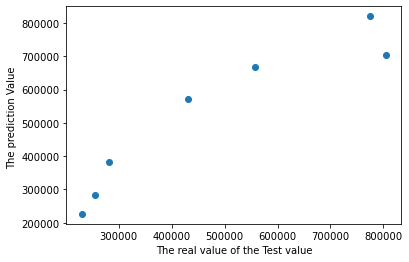

In [171]:

pre=model.predict(dff1) 
print(pre)
plt.scatter(y_test,y_pred)

plt.xlabel("The real value of the Test value")
plt.ylabel('The prediction Value ')

In [173]:
# convert to DataFrame
pre=pd.DataFrame(pre)
pre

,0
0,426173.569112
1,480495.488195
2,715071.767518
3,519919.747164
4,761169.066899
...,...
411,690901.678879
412,383085.312328
413,565633.838511
414,756504.941191


In [179]:
#convert to csv file
pre.to_csv('prediction_radwa_said.cvs',index=False)

#                         Thank you